<a href="https://colab.research.google.com/github/sinpei1902/Diamond-Price-Calculator/blob/main/diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import missingno as msno
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np # linear algebra
import pandas as pd # data processing


In [2]:
from google.colab import files
uploaded = files.upload()
import io
diamondData = pd.read_csv(io.BytesIO(uploaded['diamonds.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving diamonds.csv to diamonds (3).csv


In [3]:
diamondData.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamondData.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamondData.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamondData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
diamondData.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
diamondData.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diamondData.loc[(diamondData['x']==0) | (diamondData['y']==0) | (diamondData['z']==0)]


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
len(diamondData[(diamondData['x']==0) | (diamondData['y']==0) | (diamondData['z']==0)])

20

In [10]:
diamondData= diamondData.drop(diamondData[diamondData["x"]==0].index)
diamondData = diamondData.drop(diamondData[diamondData["y"]==0].index)
diamondData = diamondData.drop(diamondData[diamondData["z"]==0].index)
diamondData.shape


(53920, 10)

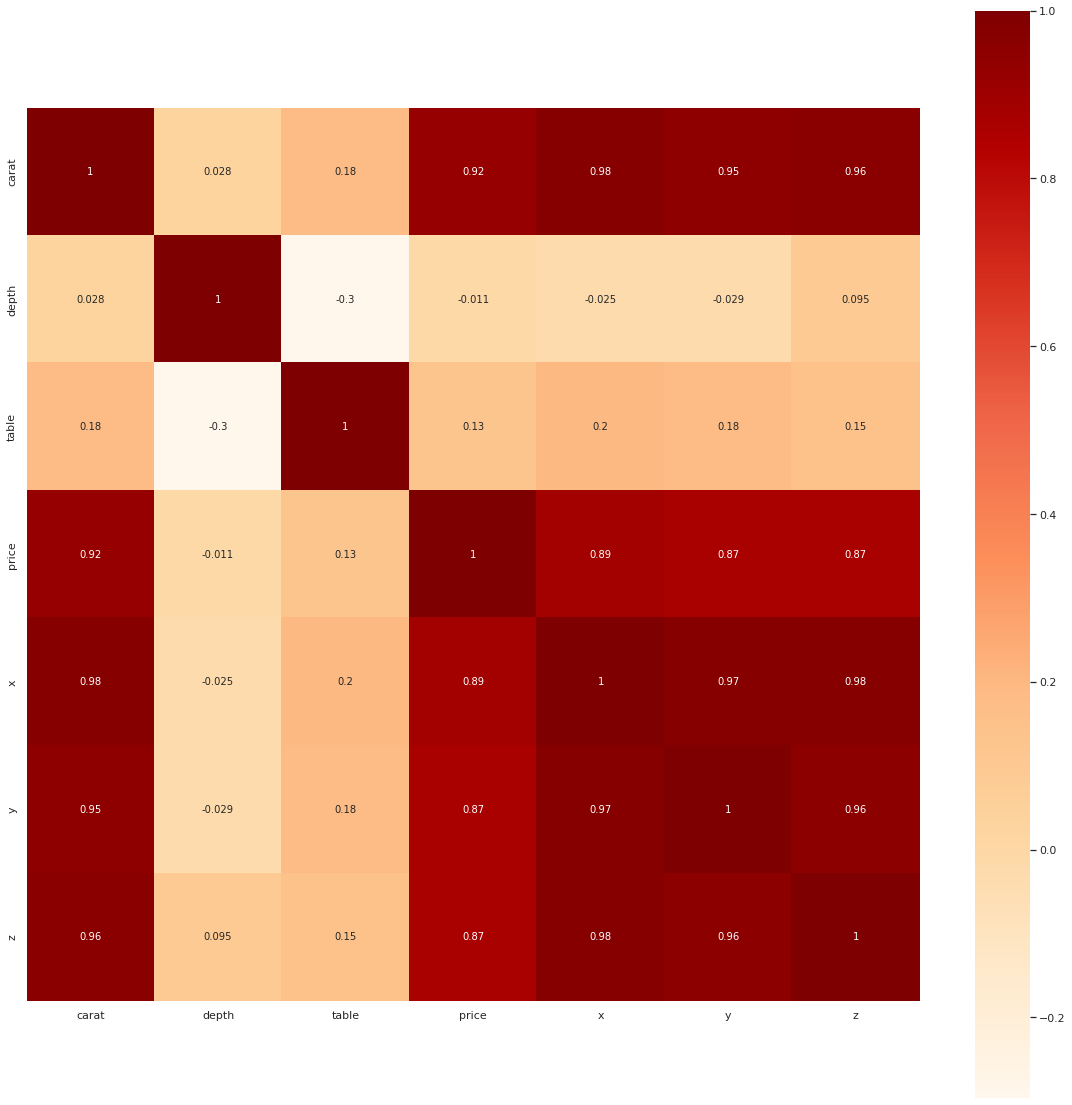

In [11]:
plt.figure(figsize=(20,20))  
graph= sns.heatmap(diamondData.corr(), annot=True,cmap='OrRd',square=True)  


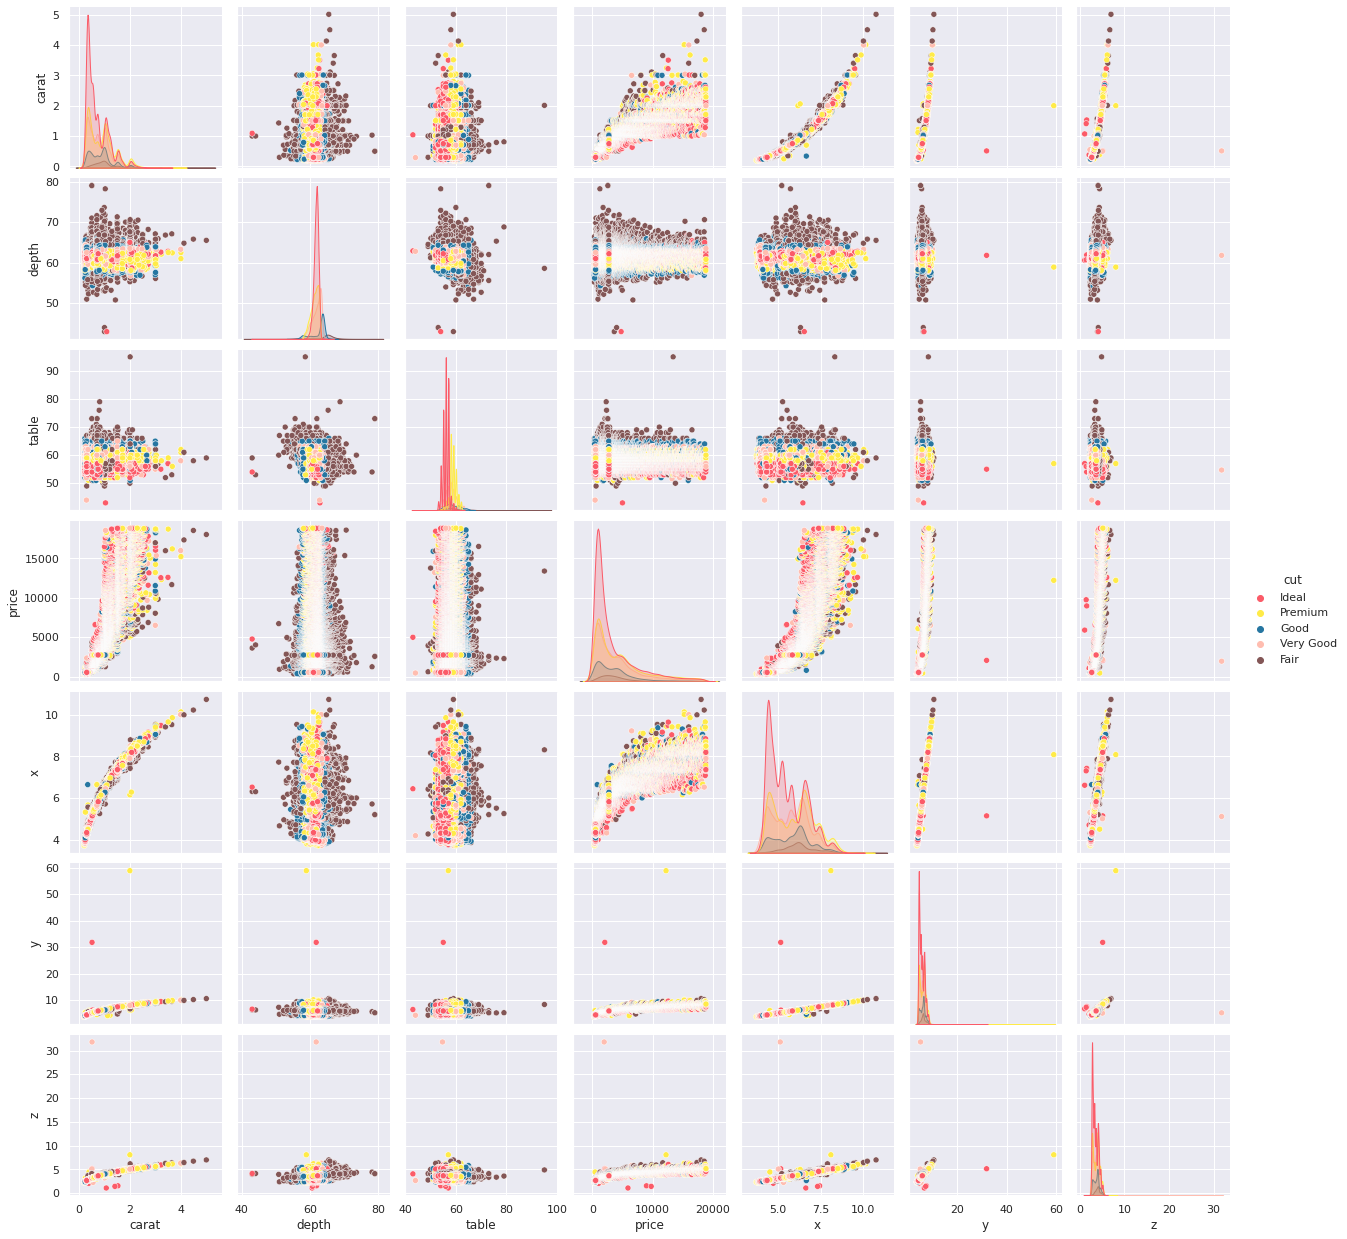

In [12]:
shade =['#FB5B68','#FFEB48','#2676A1','#FFBDB0', "#835656"]
plotpairgraph = sns.pairplot(diamondData, 
                  hue= "cut",palette=shade)

In [13]:

Q1 = diamondData.quantile(0.25)
Q3 = diamondData.quantile(0.75)
IQR = Q3-Q1
diamondData_clean=diamondData[~((diamondData<(Q1-1.5*IQR))|(diamondData>(Q3+1.5*IQR))).any(axis=1)]

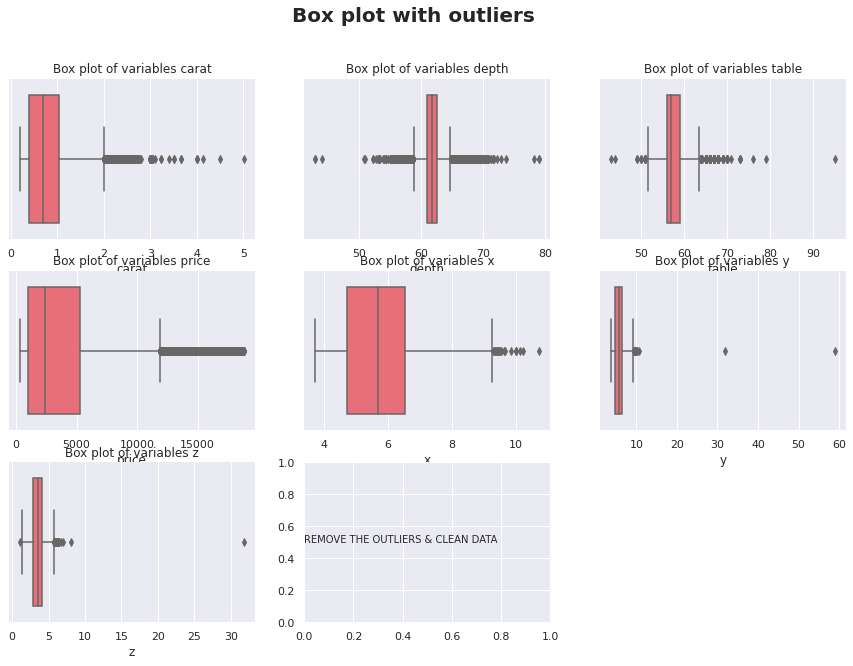

In [15]:
z=0
red =['#FB5B68','#FFEB48','#2676A1','#FFBDB0', "#835656"]
graph =plt.figure(figsize=(15,10))
plt.suptitle("Box plot with outliers",  size=20, weight='bold')
for i in int_cols:
    boxplotz = plt.subplot(331+z)
    
    boxplotz = sns.boxplot(data=diamondData, x=i,color=red[0])
    boxplotz.set_title("Box plot of variables {}".format(i))
    for j in ['left','right','top','bottom']:
        boxplotz.spines[j].set_visible(False)
    z = z +1
boxplotz =plt.subplot(331+z )
boxplotz.text(x=0,y=0.5, s ='REMOVE THE OUTLIERS & CLEAN DATA')
for j in ['left','right','top','bottom']:
        boxplotz.spines[j].set_visible(False)

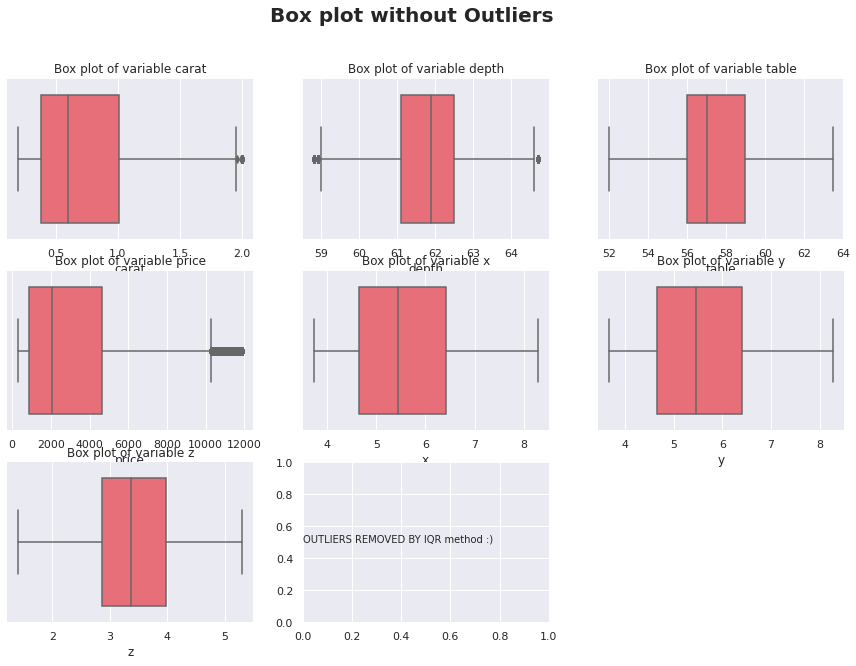

In [16]:
int_cols=diamondData_clean.select_dtypes(exclude='object').columns.to_list()
f=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Box plot without Outliers", size=20, weight='bold')
for i in int_cols:
    boxplotz=plt.subplot(331+f)
    
    boxplotz =sns.boxplot(data=diamondData_clean, x=i,color= red[0])
    boxplotz.set_title("Box plot of variable {}".format(i))
    for j in ['left','right','top','bottom']:
        boxplotz.spines[j].set_visible(False)
    f = f+1
boxplotz = plt.subplot(331+f )
boxplotz.text(x=0,y=0.5, s ='OUTLIERS REMOVED BY IQR method :)')
for j in ['left','right','top','bottom']:
        boxplotz.spines[j].set_visible(False)

In [17]:
diamondData = diamondData[(diamondData["depth"]<75)&(diamondData["depth"]>45)]
diamondData = diamondData[(diamondData["table"]<80)&(diamondData["table"]>40)]
diamondData = diamondData[(diamondData["x"]<30)]
diamondData = diamondData[(diamondData["y"]<30)]
diamondData = diamondData[(diamondData["z"]<30)&(diamondData["z"]>2)]
diamondData.shape

(53907, 10)

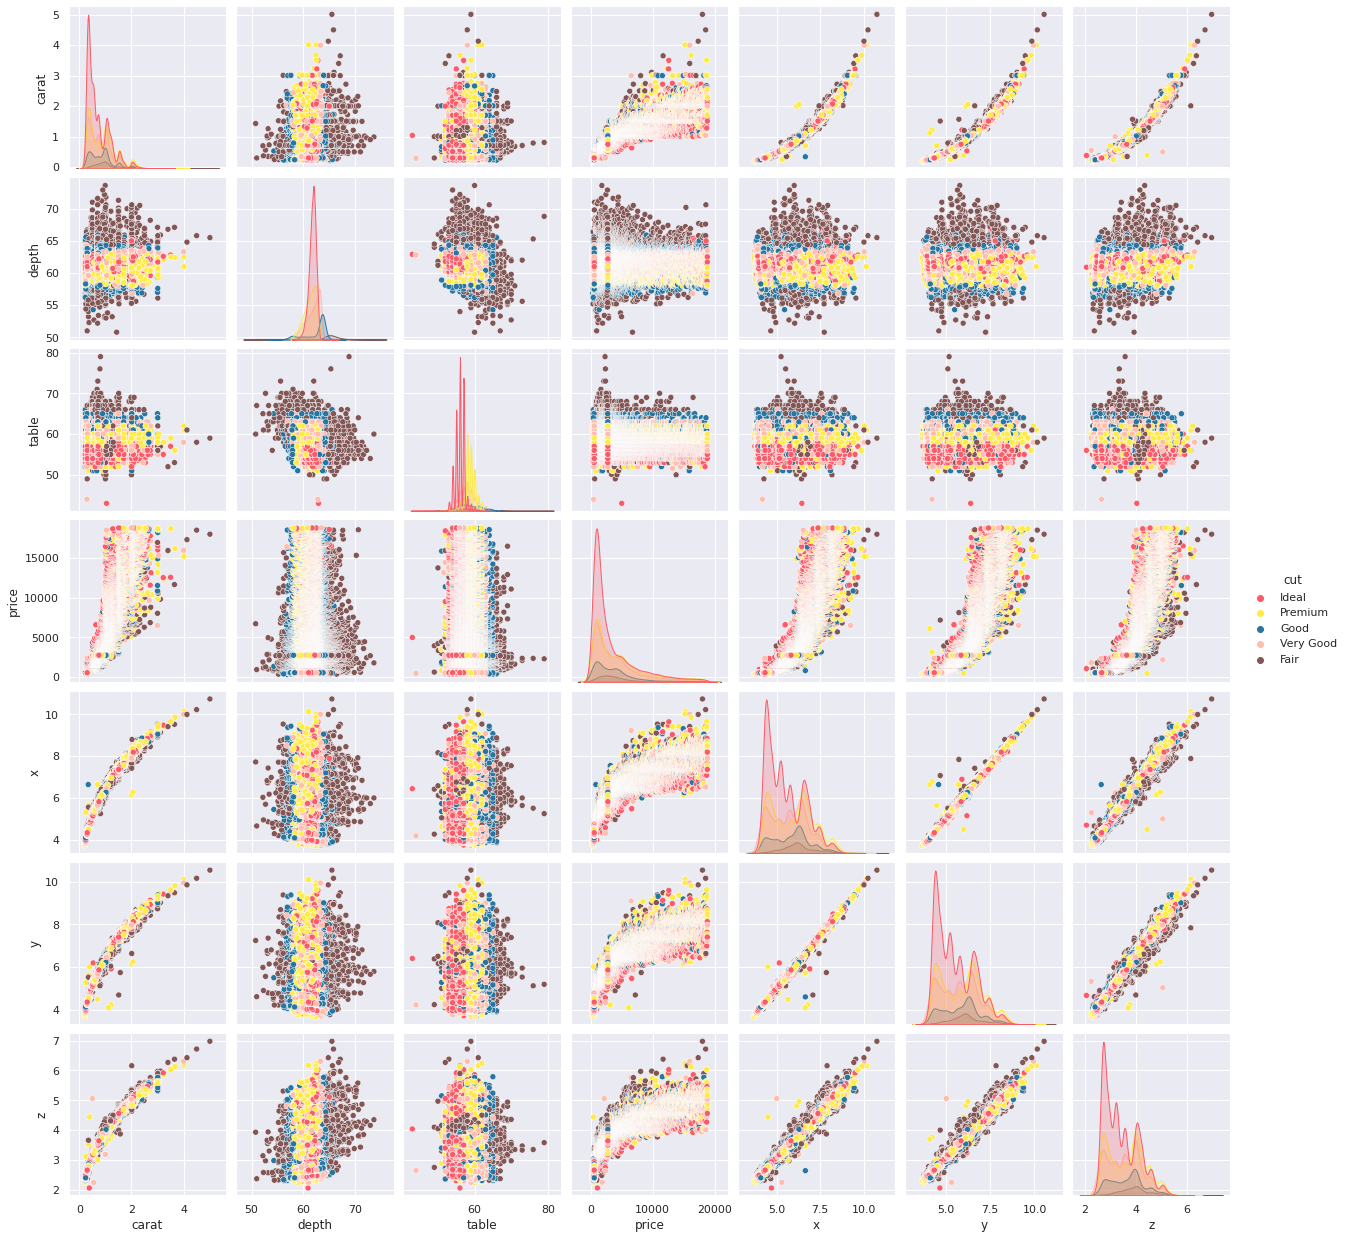

In [18]:
cl =['#FB5B68','#FFEB48','#2676A1','#FFBDB0', "#835656"]
pplot =sns.pairplot(diamondData, hue= "cut",palette= cl)


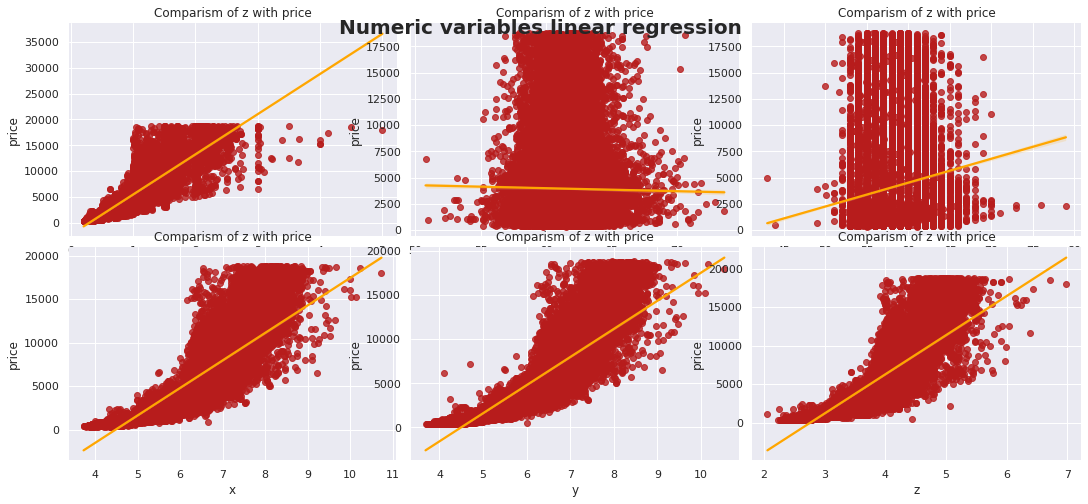

In [19]:
red =['#FFEB48',"#b71c1c",'#2676A1','#FFBDB0', "#835656"]
int_cols = diamondData.select_dtypes(exclude='object').columns.to_list()

int_cols.remove('price')
z=0
chart =plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Numeric variables linear regression ", size=20, weight='bold')
for k in int_cols:
    gph=plt.subplot(331+z)
    gph = sns.regplot(data =diamondData, x=k, y='price', color= red[1], line_kws={'color':'#ffa600'})
    gph.set_title("Comparism of {} with price".format(i))
    for j in ['left','right','top','bottom']:
        gph.spines[j].set_visible(False)
    
    z= z+1



Categorical Analysis on Variables
[]


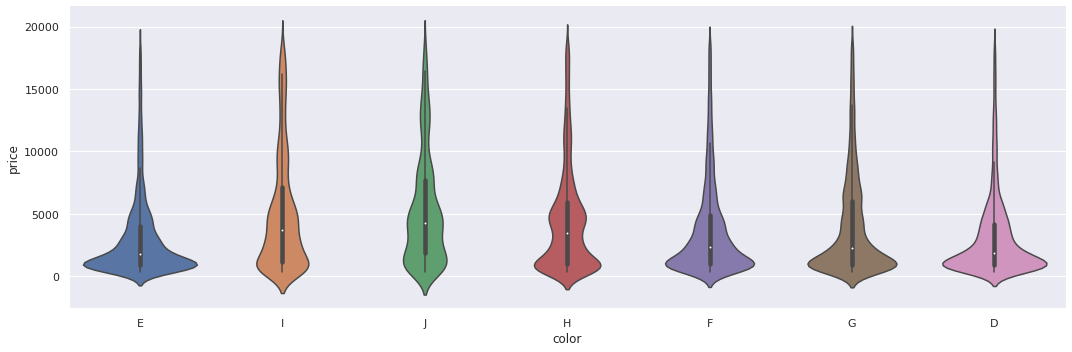

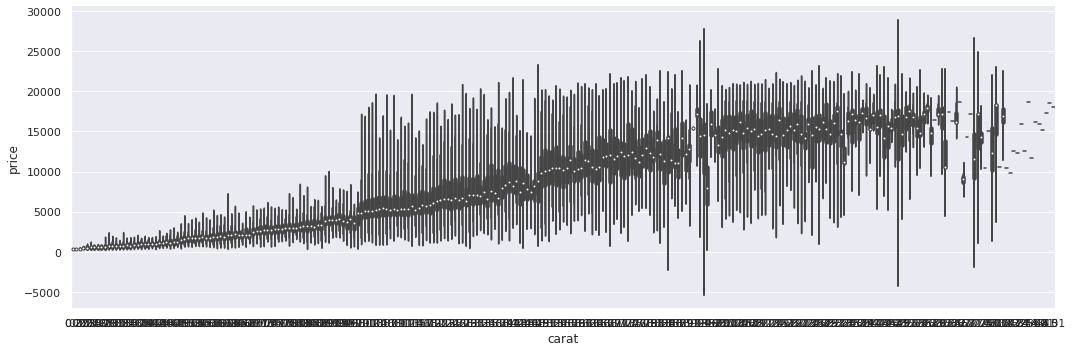

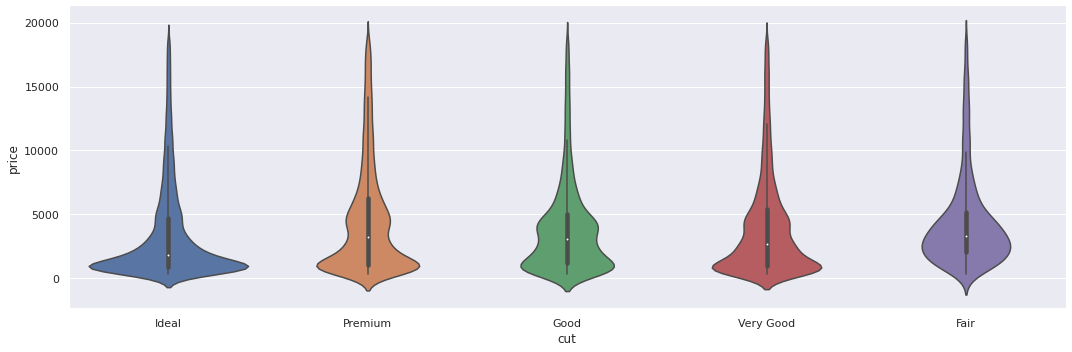

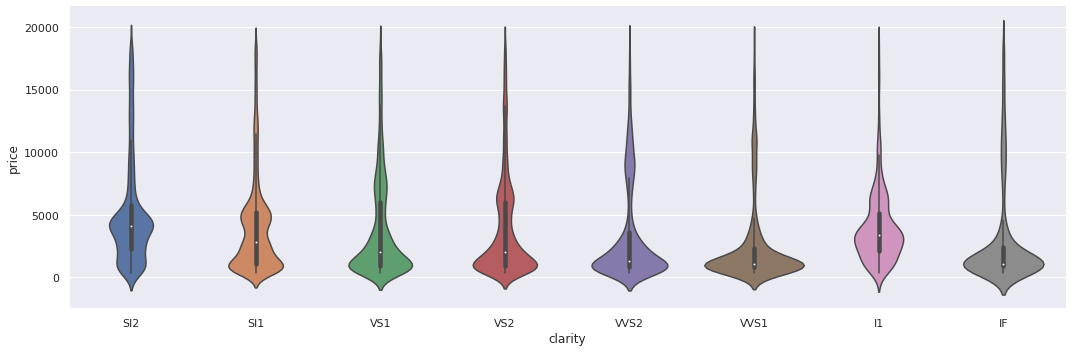

In [20]:
okc = (diamondData.dtypes =="types")
object_cols = list(okc[okc].index)
print("Categorical Analysis on Variables")
print(object_cols)

sns.factorplot(x='color', y='price' , data=diamondData , kind='violin', aspect= 3.0)
sns.factorplot(x='carat', y='price' , data=diamondData , kind='violin', aspect= 3.0)
sns.factorplot(x='cut', y='price' , data=diamondData , kind='violin', aspect= 3.0)
sns.factorplot(x='clarity', y='price' , data=diamondData , kind='violin', aspect=3.0)

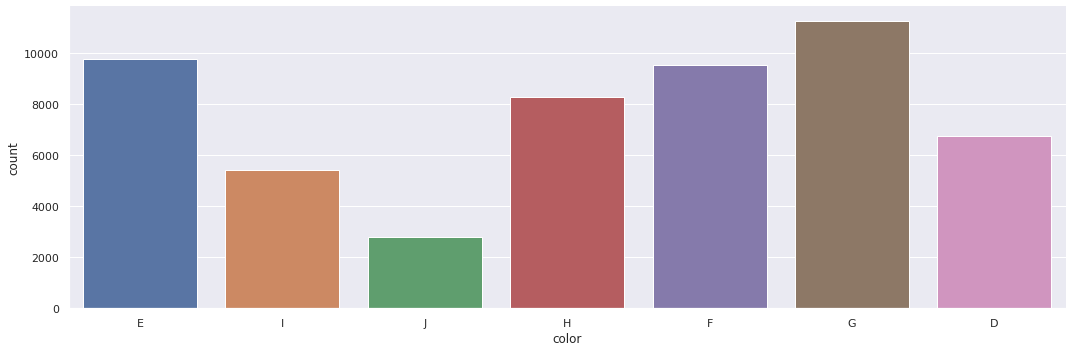

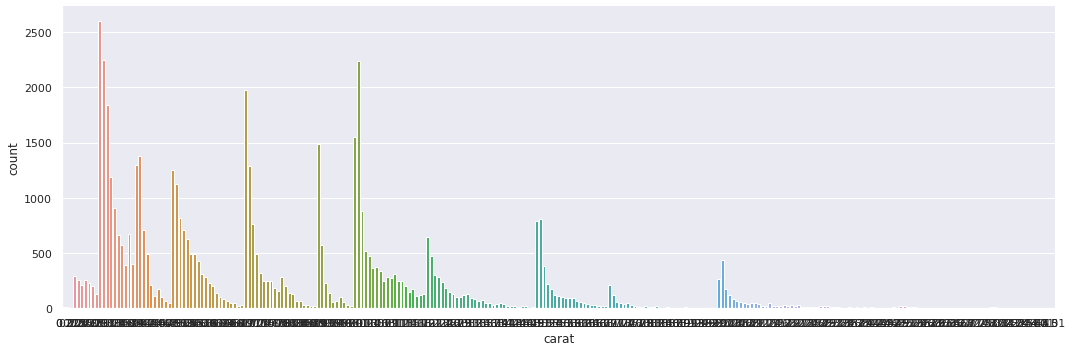

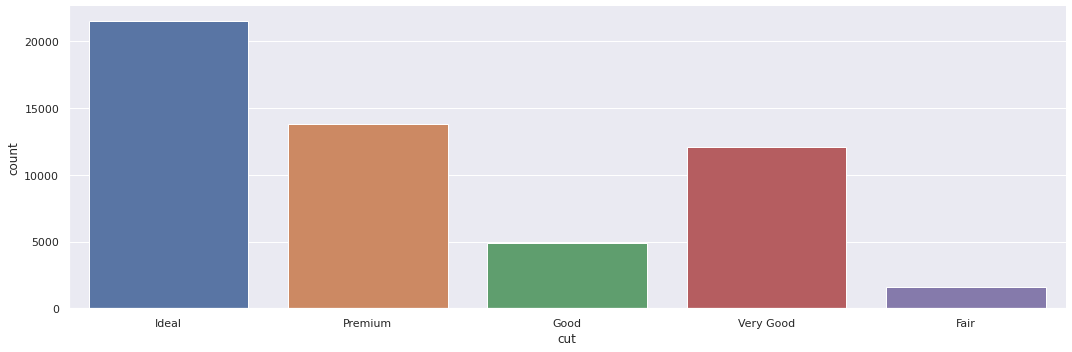

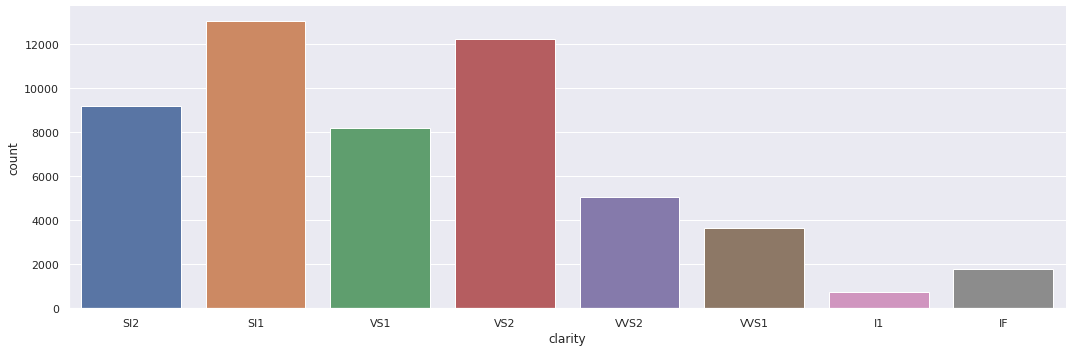

In [21]:
sns.factorplot(x='color', data=diamondData , kind='count',aspect= 3.0 )
sns.factorplot(x='carat', data=diamondData , kind='count',aspect= 3.0 )
sns.factorplot(x='cut', data=diamondData , kind='count',aspect= 3.0 )
sns.factorplot(x='clarity', data=diamondData , kind='count',aspect= 3.0 )


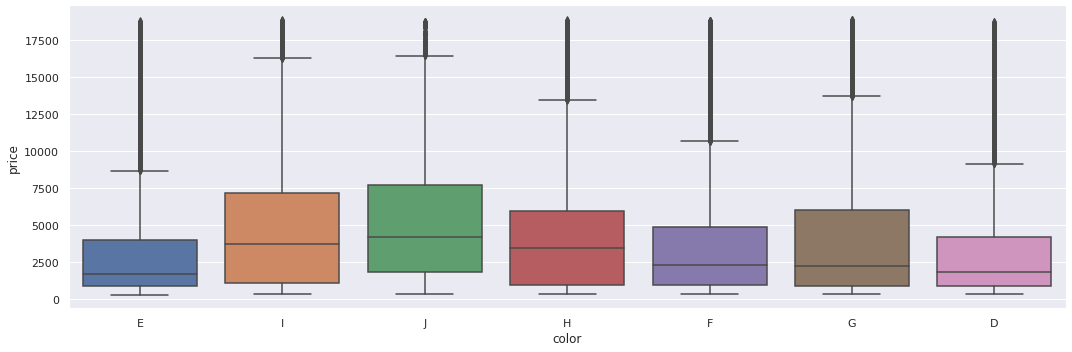

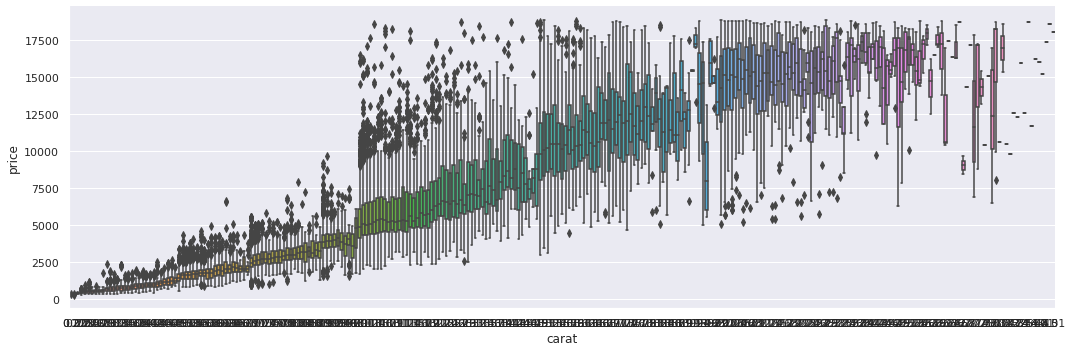

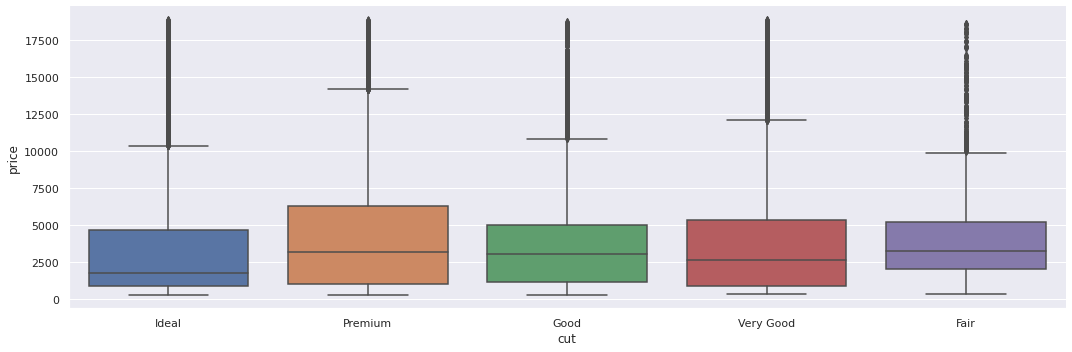

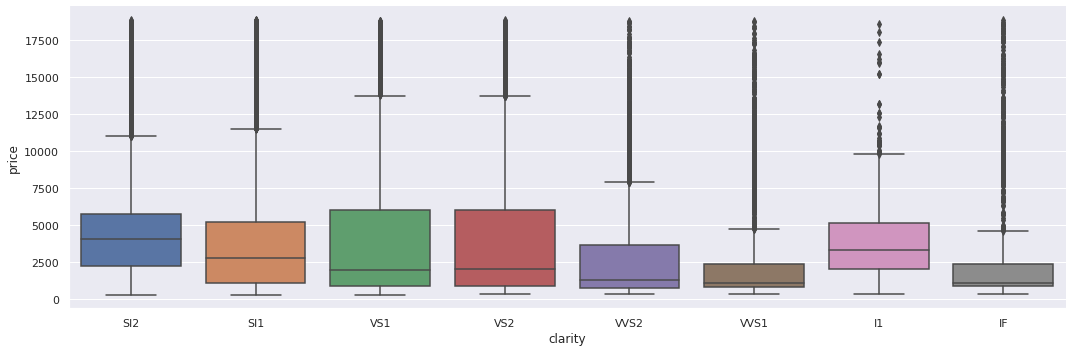

In [22]:
sns.factorplot(x='color', y='price', data=diamondData, kind='box' ,aspect=3.0 )
sns.factorplot(x='carat', y='price', data=diamondData, kind='box' ,aspect= 3.0 )
sns.factorplot(x='cut', y='price', data=diamondData, kind='box' ,aspect= 3.0 )
sns.factorplot(x='clarity', y='price', data=diamondData, kind='box' ,aspect= 3.0 )

**Machine Learning**

In [23]:
diamondData_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47524 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47524 non-null  float64
 1   cut      47524 non-null  object 
 2   color    47524 non-null  object 
 3   clarity  47524 non-null  object 
 4   depth    47524 non-null  float64
 5   table    47524 non-null  float64
 6   price    47524 non-null  int64  
 7   x        47524 non-null  float64
 8   y        47524 non-null  float64
 9   z        47524 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.0+ MB


In [24]:
diamondData_clean.drop(['depth','table'], axis=1, inplace= True)

LEdf = diamondData_clean.copy()
OHEdf = diamondData_clean.copy()

label encoding

In [25]:
LEdf.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48


In [26]:
print('Categories for cut:')
print(LEdf['cut'].value_counts())
print('')
print('Categories for color:')
print(LEdf['color'].value_counts())
print('')
print('Categories for clarity:')
print(LEdf['clarity'].value_counts())
print('')

Categories for cut:
Ideal        20340
Premium      12115
Very Good    10994
Good          3745
Fair           330
Name: cut, dtype: int64

Categories for color:
G    10081
E     8910
F     8466
H     7176
D     6195
I     4462
J     2234
Name: color, dtype: int64

Categories for clarity:
SI1     11552
VS2     10928
SI2      7402
VS1      7373
VVS2     4683
VVS1     3463
IF       1650
I1        473
Name: clarity, dtype: int64



In [27]:
#label encoding
LEdf['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],
                        [0,1,2,3,4], inplace=True)
LEdf['color'].replace(['D','E','F','G','H','I','J'],
                        [0,1,2,3,4,5,6], inplace=True)
LEdf['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],
                        [0,1,2,3,4,5,6,7], inplace=True)

In [28]:
print('Categories for cut:')
print(LEdf['cut'].value_counts())
print('')
print('Categories for color:')
print(LEdf['color'].value_counts())
print('')
print('Categories for clarity:')
print(LEdf['clarity'].value_counts())
print('')

Categories for cut:
0    20340
1    12115
2    10994
3     3745
4      330
Name: cut, dtype: int64

Categories for color:
3    10081
1     8910
2     8466
4     7176
0     6195
5     4462
6     2234
Name: color, dtype: int64

Categories for clarity:
5    11552
4    10928
6     7402
3     7373
2     4683
1     3463
0     1650
7      473
Name: clarity, dtype: int64



In [29]:
LEdf.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,0,1,6,326,3.95,3.98,2.43
1,0.21,1,1,5,326,3.89,3.84,2.31
3,0.29,1,5,4,334,4.20,4.23,2.63
4,0.31,3,6,6,335,4.34,4.35,2.75
5,0.24,2,6,2,336,3.94,3.96,2.48


In [30]:
rmseScores = []
models = ['Linear Regression', 'Random Forest Regression']

In [31]:
X= LEdf.drop(["price"],axis =1)
y= LEdf["price"]
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [32]:
lr = LinearRegression()
#train data
lr.fit(X_train,y_train)
#test data
y_pred = lr.predict(X_test)
#print 
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
print('Linear Regression:')
print('MSE      : %0.2f ' % mse)
print('RMSE     : %0.2f ' % rmse)

rmseScores.append(rmse)

rf = RandomForestRegressor()
#train data
rf.fit(X_train,y_train)
#test data
y_pred = rf.predict(X_test)
#print 
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
print('')
print('Random Forest Regression:')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)

rmseScores.append(rmse)

Linear Regression:
MSE      : 667462.56 
RMSE     : 816.98 

Random Forest Regression:
MSE    : 139166.23 
RMSE   : 373.05 


In [33]:
LEcompare = pd.DataFrame({'Model':models,
                           'RMSE':rmseScores})
LEcompare.head()

,Model,RMSE
0,Linear Regression,816.983817
1,Random Forest Regression,373.049901


One Hot Encoding

In [34]:
OHEdf.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48


In [35]:
for var in ['Ideal','Premium','Very Good','Good','Fair']:
    OHEdf[var] = np.where(OHEdf['cut']== var, 1, 0)
for var in ['D','E','F','G','H','I','J']:
    OHEdf[var] = np.where(OHEdf['color']== var, 1, 0)
for var in ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']:
    OHEdf[var] = np.where(OHEdf['clarity']== var, 1, 0)
OHEdf.drop(['cut','color','clarity'], axis=1, inplace= True)
OHEdf.head()

,carat,price,x,y,z,Ideal,Premium,Very Good,Good,Fair,...,I,J,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
0,0.23,326,3.95,3.98,2.43,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,326,3.89,3.84,2.31,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.29,334,4.20,4.23,2.63,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,335,4.34,4.35,2.75,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5,0.24,336,3.94,3.96,2.48,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [36]:
rmseScores = []
models = ['Linear Regression', 'Random Forest Regression']

In [37]:
X= OHEdf.drop(["price"],axis =1)
y= OHEdf["price"]
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [38]:
lr = LinearRegression()
#train data
lr.fit(X_train,y_train)
#test data
y_pred = lr.predict(X_test)
#print 
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
print('Linear Regression:')
print('MSE      : %0.2f ' % mse)
print('RMSE     : %0.2f ' % rmse)

rmseScores.append(rmse)

rf = RandomForestRegressor()
#train data
rf.fit(X_train,y_train)
#test data
y_pred = rf.predict(X_test)
#print 
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
print('')
print('Random Forest Regression:')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)

rmseScores.append(rmse)

Linear Regression:
MSE      : 589470.49 
RMSE     : 767.77 

Random Forest Regression:
MSE    : 143179.74 
RMSE   : 378.39 


In [39]:
OHEcompare = pd.DataFrame({'Model':models,
                           'RMSE':rmseScores})
OHEcompare.head()

,Model,RMSE
0,Linear Regression,767.769815
1,Random Forest Regression,378.390993


Label Encoding vs One Hot Encoding

In [40]:
print('Label Encoding:')
print(LEcompare)
print('')
print('One Hot Encoding:')
print(OHEcompare)

Label Encoding:
                      Model        RMSE
0         Linear Regression  816.983817
1  Random Forest Regression  373.049901

One Hot Encoding:
                      Model        RMSE
0         Linear Regression  767.769815
1  Random Forest Regression  378.390993


Diamond Price Calculator using Random Forest Regressor + Label Encoding

In [41]:
X= LEdf.drop(["price"],axis =1)
y= LEdf["price"]
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

rf = RandomForestRegressor()
#train data
rf.fit(X_train,y_train)
#test data
y_pred = rf.predict(X_test)

In [101]:
#@title Diamond Price Calculator { run: "auto", vertical-output: true }
#@markdown CARAT:
Carat =  0.71#@param {type:"number"}
#@markdown CUT:
#@markdown 0: Ideal //
#@markdown 1: Premium //
#@markdown 2: Very Good //
#@markdown 3: Good //
#@markdown 4: Fair 
Cut = 0 #@param {type:"slider", min:0, max:4, step:1}
#@markdown COLOR:
#@markdown 0: D //
#@markdown 1: E //
#@markdown 2: F //
#@markdown 3: G //
#@markdown 4: H //
#@markdown 5: I //
#@markdown 6: J 
Color = 3 #@param {type:"slider", min:0, max:6, step:1}
#@markdown CLARITY:
#@markdown 0: IF //
#@markdown 1: VVS1 //
#@markdown 2: VVS2 //
#@markdown 3: VS1 //
#@markdown 4: VS2 //
#@markdown 5: SI1 //
#@markdown 6: SI2 //
#@markdown 7: I1 
Clarity = 5 #@param {type:"slider", min:0, max:7, step:1}
#@markdown DIMENSIONS (in mm): x: length // y: width // z: depth
x =  5.8#@param {type:"number"}
y =  5.76#@param {type:"number"}
z =  3.5#@param {type:"number"}
y_pred = rf.predict([[Carat,Cut,Color,Clarity,x,y,z]])
print('price: ', y_pred)

price:  [2656.60333333]


Testing

In [43]:
from random import randint

In [44]:
diamondData_clean.reset_index()

,index,carat,cut,color,clarity,price,x,y,z
0,0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
3,4,0.31,Good,J,SI2,335,4.34,4.35,2.75
4,5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...
47519,53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
47520,53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
47521,53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
47522,53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [59]:
print(diamondData_clean.iloc[[randint(0,47523)]])

     carat    cut color clarity  price    x     y    z
185   0.71  Ideal     G     SI1   2776  5.8  5.76  3.5
